# Handling Class Imbalance: Logistic Regression

In [28]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data_path = "train.csv"
data_raw = pd.read_csv(data_path)
data_raw.shape

(159571, 8)

In [30]:
data_raw.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [31]:
data_raw=data_raw[~data_raw.index.duplicated()]
data_raw['bad_comment']=0
data_raw['bad_comment']= data_raw.iloc[:,2:].sum(axis=1)
data_raw.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,bad_comment
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


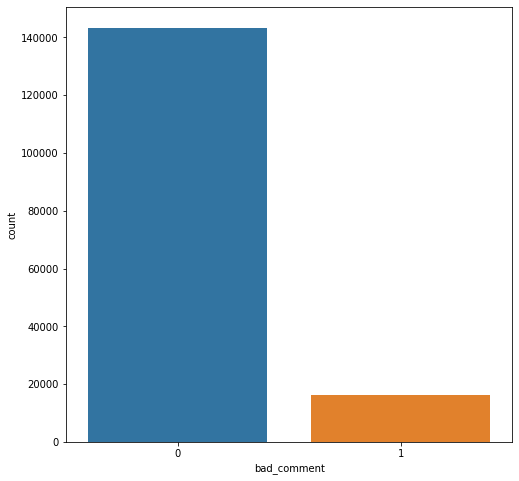

In [32]:
df=data_raw
df['bad_comment'].values[df['bad_comment'].values >= 1] = 1
plt.figure(figsize=(8, 8))
sns.countplot('bad_comment', data=df)

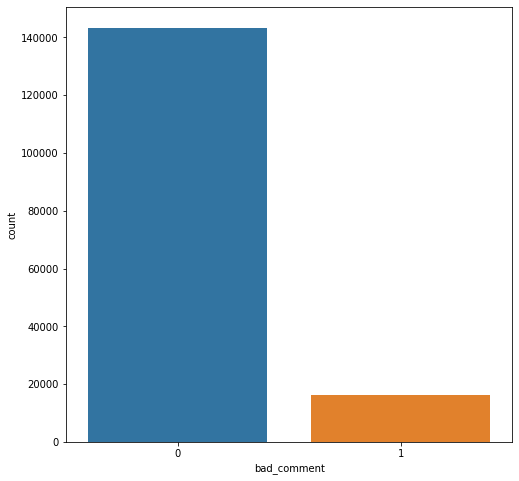

In [33]:
plt.figure(figsize=(8, 8))
sns.countplot('bad_comment', data=df)

In [34]:
from sklearn.utils import resample
data_raw3=df


df_majority = df[df.bad_comment==0]
df_minority = df[df.bad_comment>=1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.bad_comment.value_counts()

df_downsampled.shape

(36225, 9)

In [35]:
data2=df_downsampled
missing_values_check = data2.isnull().sum()
print(missing_values_check)
data2.drop(['bad_comment'],axis=1)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
bad_comment      0
dtype: int64


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
109552,49fe9d6d02892336,yo man \n\nwhats rong with u?\nu blokd my skoo...,0,0,0,0,0,0
102895,26b1404561207d1f,ciao little mafiosu D \nwhy do you delete the ...,0,0,0,0,0,0
134848,d12d83617f2ab1c2,REDIRECT Talk:Lichen planus–lichen sclerosus o...,0,0,0,0,0,0
50727,879e8dcf148c9aa3,Stop vandalizing stuff. I'am watching your eve...,0,0,0,0,0,0
25174,429eaf95dcb44d7b,LVATT\nstop changing lvatt in charts leave it ...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [36]:
data_raw=data2
rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  36225
Number of clean comments =  20000
Number of comments with labels = 16225


In [37]:
categories=['toxic','severe_toxic','obscene','threat','identity_hate','insult']
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'identity_hate', 'insult']


In [38]:
counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,identity_hate,1405
5,insult,7877


In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [40]:
def removehtml(text):
    ctags=re.compile('<.*?>')
    withouthtml=re.sub(ctags,' ',str(text))
    return withouthtml

def removeextra(text):
    regex=re.compile('[^a-zA-Z\s]')
    cleanedtext = re.sub(regex,'',text)
    cleanedtext= cleanedtext.replace("\n",'')
    cleanedtext= cleanedtext.strip()
    return cleanedtext

In [41]:
df = data_raw
df = df.loc[np.random.choice(df.index, size=8000)]

df['comment_text']= df['comment_text'].str.lower()
df['comment_text']= df['comment_text'].apply(removehtml)
df['comment_text']= df['comment_text'].apply(removeextra)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,bad_comment
53948,9029c388a2b63a25,dear good olfactory your decision on upmerging...,0,0,0,0,0,0,0
33949,5a8e74886b480cf2,darkness shines please advise under what prete...,0,0,0,0,0,0,0
140695,f0e2333007899026,max pumpkin owns wikipedia max pumpkin owns yo...,0,0,1,0,1,0,1
29155,4d489b38c78f8a21,afd nomination of chris d jacksonchris d jacks...,0,0,0,0,0,0,0
53477,8efb7be6057ba9a9,a friendly heads up i thought it was only fair...,0,0,0,0,0,0,0


In [42]:
def removestopwords(text):
    new_words=[]
    for w in text.split():
        if w not in stop_words:
            new_words.append(w)
    removedstop=' '.join(word for word in new_words)
    return removedstop

def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

In [43]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
our_stop_words=set(['nine','eight','seven','six','five','four','three','two','one','zero','among','may','across','yet','within','also','however','beside'])
stop_words = Union(stop_words,our_stop_words)
df['comment_text']= df['comment_text'].apply(removestopwords)
df.head()

[nltk_data] Downloading package stopwords to /home/cli-
[nltk_data]     ninja/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,bad_comment
53948,9029c388a2b63a25,dear good olfactory decision upmerging every c...,0,0,0,0,0,0,0
33949,5a8e74886b480cf2,darkness shines please advise pretext undo pos...,0,0,0,0,0,0,0
140695,f0e2333007899026,max pumpkin owns wikipedia max pumpkin owns yo...,0,0,1,0,1,0,1
29155,4d489b38c78f8a21,afd nomination chris jacksonchris jackson arti...,0,0,0,0,0,0,0
53477,8efb7be6057ba9a9,friendly heads thought fair warn corresponding...,0,0,0,0,0,0,0


In [44]:
ss=SnowballStemmer("english")
def stem(text):
    stemtext=[]
    for word in text.split():
        stem= ss.stem(word)
        stemtext.append(stem)
    stemsen=' '.join(word for word in stemtext)
    return stemsen

df['comment_text'] = df['comment_text'].apply(stem)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,bad_comment
53948,9029c388a2b63a25,dear good olfactori decis upmerg everi categor...,0,0,0,0,0,0,0
33949,5a8e74886b480cf2,dark shine pleas advis pretext undo post babur...,0,0,0,0,0,0,0
140695,f0e2333007899026,max pumpkin own wikipedia max pumpkin own yout...,0,0,1,0,1,0,1
29155,4d489b38c78f8a21,afd nomin chris jacksonchri jackson articl cre...,0,0,0,0,0,0,0
53477,8efb7be6057ba9a9,friend head thought fair warn correspond email...,0,0,0,0,0,0,0


In [45]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(5600, 9)
(2400, 9)


In [46]:
train_output = train['comment_text']
test_output = test['comment_text']

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer(strip_accents='unicode',  norm='l2', analyzer='word', ngram_range=(1,3))
tfidf_vector.fit(train_output)
tfidf_vector.fit(test_output)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [48]:
x_train = tfidf_vector.transform(train_output)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = tfidf_vector.transform(test_output)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [49]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
ovr_model = LogisticRegression(multi_class='ovr',  solver='sag', n_jobs=-1)
for label in categories:
    ovr_model.fit(x_train, train[label])
    ovr_output = ovr_model.predict(x_test)
    print('{} Accuracy Score = {} \n'.format(label, accuracy_score(test[label], ovr_output)))

toxic Accuracy Score = 0.82 

severe_toxic Accuracy Score = 0.9566666666666667 

obscene Accuracy Score = 0.8283333333333334 

threat Accuracy Score = 0.9841666666666666 

identity_hate Accuracy Score = 0.96375 

insult Accuracy Score = 0.8141666666666667 

CPU times: user 400 ms, sys: 12.3 ms, total: 412 ms
Wall time: 631 ms


In [50]:
%%time
from skmultilearn.problem_transform import BinaryRelevance
br_model = BinaryRelevance(LogisticRegression())
br_model.fit(x_train, y_train)
br_output = br_model.predict(x_test)

/home/cli-ninja/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cli-ninja/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cli-ninja/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cli-ninja/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/cli-ninja/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_mod

CPU times: user 19 s, sys: 14.4 s, total: 33.5 s
Wall time: 19.9 s


In [51]:
print("Accuracy Score = ",accuracy_score(y_test,br_output))
print("\n")

Accuracy Score =  0.6133333333333333




In [ ]:
%%time
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
cc_model = ClassifierChain(LogisticRegression(solver='lbfgs'))
cc_model.fit(x_train, y_train)
cc_output = cc_model.predict(x_test)

In [ ]:
print("Accuracy Score = ",accuracy_score(y_test,cc_output))
print("\n")